# NEW YORK HOUSE PRICES (Sep 2016- Sep 2017)

#### Soostone Case Study, October 2021



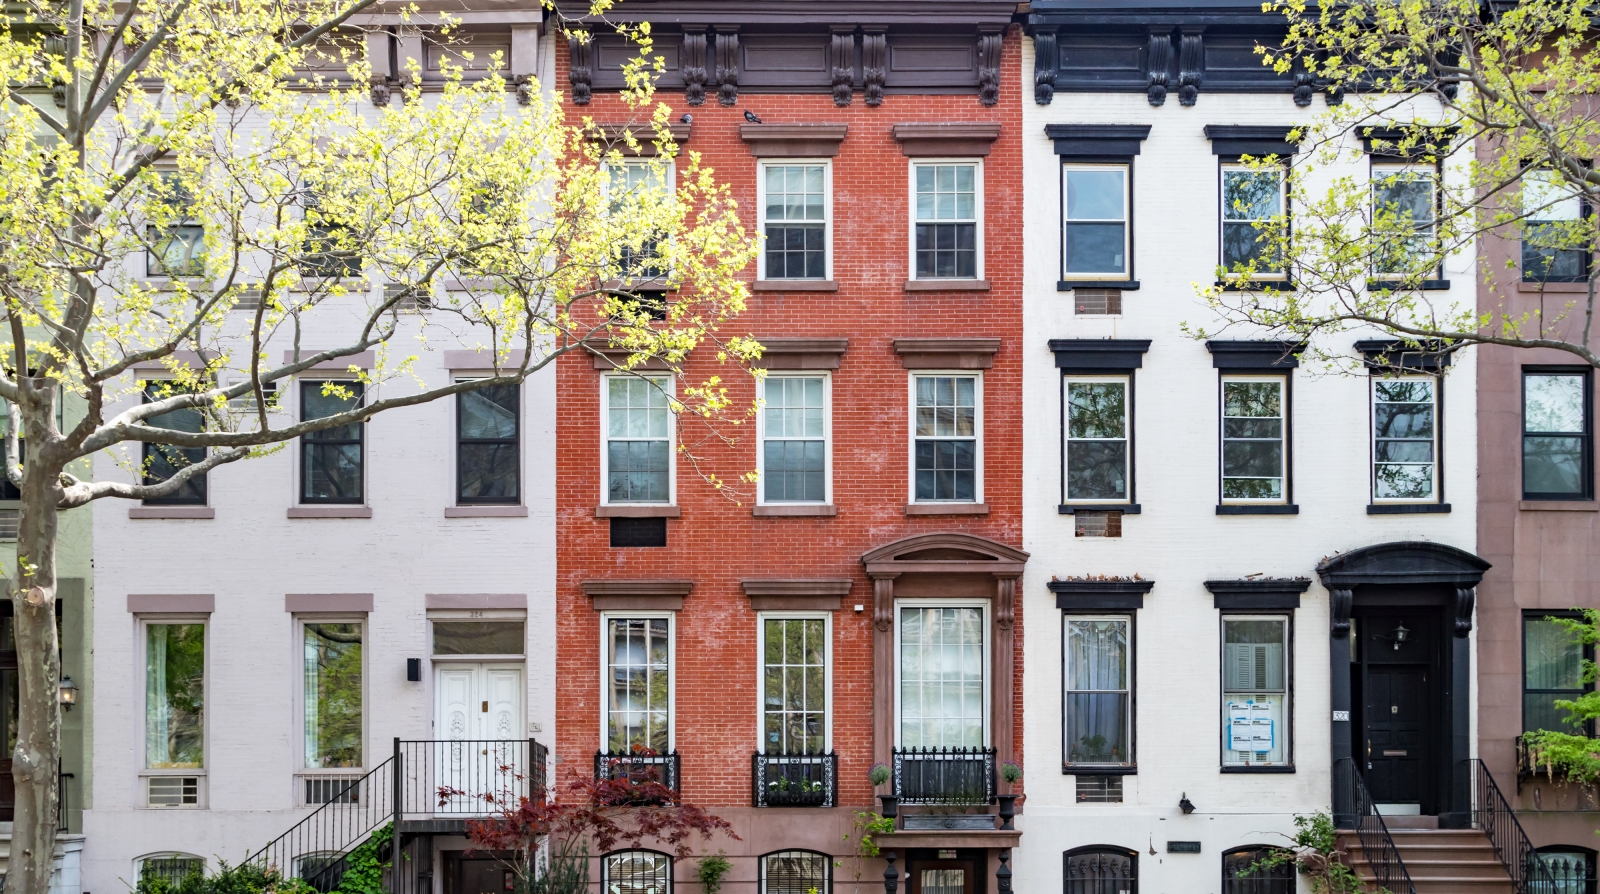

In [1]:
# Brick townhouses on 30th Street in Manhattan. (Source: Deberrarr/Getty Images.
from IPython.display import Image
display(Image(filename='Images/GettyImages-960885430-afe816.jpeg', width="1000px") )


- **NYC Real Estate Prices Data** contains 20 property features plus the sale price and the id column (with some duplicate values), along with 84548 observations.

> Median Real Estate Prices in New York

- The median house price in New York is **US$ 625,500** between September 2016 and September 2017.

- As of **September 2017**, the median sales price of residential properties in New York City reached approximately **699,000 U.S. dollars**, up from **595,000 in September 2016**. Residential properties refer to data where tax class 4 properties are excluded.

- The 50% of houses had price US$ 625,500 and less. 

- Less than 25% houses had price up to US$ 370,000.

- Houses from 25%-50% range had prices between US$ 370,000 and US$ 625,000.

- The most expensive 25% of the houses had prices higher than US$ 1,070,000

> Borough & Neighborhoods

- Manhattan is the most expensive borough with the most expensive neighborhoods in New York along with Long Island from Queens and Downtown neighborhoods from Brooklyn. Land square feet to Gross Square Feet is also higher in Manhattan most likely due to higher buildings. 

- The Staten Island can be relatively new borough containing residental areas as well as investment in commercial buildings after 1960s. 

- Manhattan and Brooklyn have higher price per square feet ratio while Staten Island has the lowest price ratio.

- In Bronx, there aren't available houses built after 1960.

- Excluding the central districts in each borough and Manhattan, the median sales prices remain under $ 1 Million 

> House Sales & Median Prices over Time

- The median prices over a year has an upward trend and sales are more consistent between July 2017 and September 2017.

- While the day of the week doesn't affect the  median price of the house, the sales peaked during the midweek in 2016 and 2017. House sales during the weekend is at the bottom levels. 



In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from ipywidgets import FloatProgress

%matplotlib inline

import re

In [264]:
#Import Data
df = pd.read_csv("nyc-rolling-sales.csv")

In [265]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

- There are 84548 houses and 22 attributes


In [266]:
df.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2     6625000  2017-07-19 00:00:00  
1                              C7         -    2016-12-14 00:00:00  
2                              C7         -    2016-12-09 00:00:00  
3                              C4     3936272  2016-09-23 00:00:00  
4                              C2     8000000  2016-11-17 00:00:00  

[5 rows x 22 columns]

# A. PREPROCESSING 

## 1. Missing Values

In [267]:
#Initial Missing Values
((df.isnull().sum().sort_values(ascending=False)/len(df)).round(4) * 100).head()

SALE DATE                  0.0
SALE PRICE                 0.0
BOROUGH                    0.0
NEIGHBORHOOD               0.0
BUILDING CLASS CATEGORY    0.0
dtype: float64

- Despite that data seems to have no missing values, this often happens due to different type of representations in missing values.
- "-", " - " are missing values in this dataset.
- Also some numerical values with "0" may indicate missing values such as SALE PRICE, GROSS - LAND SUQARE FEET.

In [268]:
#Convert missing representations to np.nan values
df["LAND SQUARE FEET"] = df["LAND SQUARE FEET"].replace(' -  ', np.nan ,regex=True)
df["GROSS SQUARE FEET"] = df["GROSS SQUARE FEET"].replace(' -  ', np.nan ,regex=True)
df["SALE PRICE"] = df["SALE PRICE"].replace('-', np.nan, regex=True)

In [269]:
#Drop SALE PRICE missing values
df = df[df["SALE PRICE"].notnull()]
df["SALE PRICE"] = df["SALE PRICE"].astype(str).astype(int)

In [270]:
#Missing Ratio of Attributes:
(df.isnull().sum().sort_values(ascending=False)/len(df)).round(4) * 100

GROSS SQUARE FEET                 31.06
LAND SQUARE FEET                  30.27
SALE DATE                          0.00
ADDRESS                            0.00
BOROUGH                            0.00
NEIGHBORHOOD                       0.00
BUILDING CLASS CATEGORY            0.00
TAX CLASS AT PRESENT               0.00
BLOCK                              0.00
LOT                                0.00
EASE-MENT                          0.00
BUILDING CLASS AT PRESENT          0.00
APARTMENT NUMBER                   0.00
SALE PRICE                         0.00
ZIP CODE                           0.00
RESIDENTIAL UNITS                  0.00
COMMERCIAL UNITS                   0.00
TOTAL UNITS                        0.00
YEAR BUILT                         0.00
TAX CLASS AT TIME OF SALE          0.00
BUILDING CLASS AT TIME OF SALE     0.00
Unnamed: 0                         0.00
dtype: float64

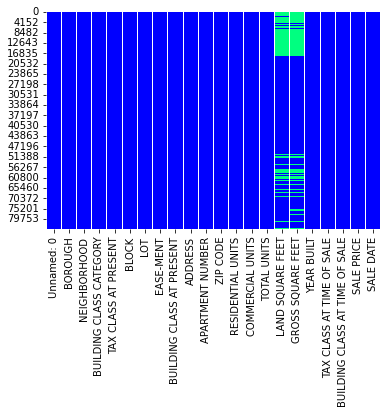

In [271]:
#Missing patterns
sns.heatmap(df.isnull(), cbar=False, cmap="winter")

- Remove rows missing SALE PRICE
- LAND/GROSS SQUARE FEET Drop/impute
- Impute some of the values with groupby

df['value'] = df['value'].fillna(df.groupby('name')['value'].transform('mean')))

In [273]:
# Houses with LAND & GROSS SQUARE AREA and SALE PRICE missing at the same time:
len(df[(df["LAND SQUARE FEET"].isnull())&(df["GROSS SQUARE FEET"].isnull())&(df["SALE PRICE"].isnull())])/len(df)

0.0

In [274]:
# Houses with LAND & GROSS SQUARE AREA are missing at the same time:
len(df[(df["LAND SQUARE FEET"].isnull())&(df["GROSS SQUARE FEET"].isnull())])/len(df)

0.30268478431708745

- We will keep land/gross squre feet for EDA and will drop for modelling. Somehow, the best option would be to experiment group imputations and track data versions.

In [275]:
# TAX CLASSES RATIO OF HOUSES WITH LAND & GROSS SQUARE FEET INFORMATION is missing:
df[(df["LAND SQUARE FEET"].isnull())&(df["GROSS SQUARE FEET"].isnull())]["TAX CLASS AT TIME OF SALE"].value_counts()/df["TAX CLASS AT TIME OF SALE"].value_counts()

1    0.021419
2    0.620285
3         NaN
4    0.121269
Name: TAX CLASS AT TIME OF SALE, dtype: float64

- Tax Class 1: Most residential property of up to three units (family homes and small stores or offices with one or two apartments attached), and most condominiums that are not more than three stories.
- Tax Class 1 and 2 often includes the residential properties. Somehow high ratio of houses in tax class 2, such as apartments either condos or coops have high ratio of missing values in square feet. 
- For tax class 2 and 3, more than 50% of the data have missing values in the square feet of the house. Since, square feet is an important attribute, our conclusions in class 2 and 3 may have some sample bias or missing information. 
- It would be better to for real estate softwares, some design updates and check system could improve the quality of data in data collection. 


## 2. Datatypes

- SALE DATE: object -> datetime
- BOROUGH: integer -> string
- ZIPCODE: integer -> string
- LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE: object -> integer 

In [276]:
#Fix datatypes
df = df.astype({'SALE DATE': 'datetime64[ns]', 'ZIP CODE': 'object', "BOROUGH": "object"})

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      69987 non-null  int64         
 1   BOROUGH                         69987 non-null  object        
 2   NEIGHBORHOOD                    69987 non-null  object        
 3   BUILDING CLASS CATEGORY         69987 non-null  object        
 4   TAX CLASS AT PRESENT            69987 non-null  object        
 5   BLOCK                           69987 non-null  int64         
 6   LOT                             69987 non-null  int64         
 7   EASE-MENT                       69987 non-null  object        
 8   BUILDING CLASS AT PRESENT       69987 non-null  object        
 9   ADDRESS                         69987 non-null  object        
 10  APARTMENT NUMBER                69987 non-null  object        
 11  ZI

In [278]:
#Apartment number value count to check missing values
df["APARTMENT NUMBER"].value_counts()

         54491
4          286
3A         265
2          264
3          250
         ...  
231-3        1
COM1E        1
10KS         1
108TH        1
35BW         1
Name: APARTMENT NUMBER, Length: 3320, dtype: int64

- Some apartment numbers are coded with string characters, so we don't change the object data type. 

## 3. Duplicates

In [279]:
df.duplicated().sum()

0

In [280]:
used_features =[
    "BOROUGH",
    "NEIGHBORHOOD",
    "BLOCK",
    "LOT",
    "APARTMENT NUMBER"
]

df.duplicated(used_features).sum()

14495

- Index 208 and 209 have the same attributes including the date of the sale. Price is ambiguous.
- Index 223 and 224 have the same attributes but different prices despite that these apartments sold on the same date. 


In [281]:
df[df.duplicated(used_features)].head().style.set_properties(**{'background-color': 'blue','color': 'lawngreen'}, subset=used_features).set_properties(**{'background-color': 'lawngreen'}, subset="SALE PRICE")

In [282]:
df[df.duplicated(used_features)]["SALE PRICE"].max()

138106368

In [283]:
df[df["Unnamed: 0"].isin([10489, 10490, 10491])].style.set_properties(**{'background-color': 'blue','color': 'lawngreen'}, subset=used_features).set_properties(**{'background-color': 'lawngreen'}, subset="SALE PRICE")

- Most of the features including the address,  commercial unit, total unit, land and gross square feet, year built - SAME.
- Somehow one of 3 observation have $138M price while other 2 observation have 0 SALE PRICE. Other 2 office building could be the same price or less likely but still possible alternative explanation could be that 3 of them have prices sum up to  $138M or there is another reason that the same building occurred/added to data multiple times.

## 4. Outliers

#### LAND & GROSS SQUARE FEET

In [284]:
df.describe().T.apply(lambda s: s.apply('{0:.5f}'.format))

count           mean             std  \
Unnamed: 0                 69987.00000    10287.50382      7098.65133   
BLOCK                      69987.00000     4196.07253      3429.19652   
LOT                        69987.00000      373.82840       656.09653   
RESIDENTIAL UNITS          69987.00000        1.89955        14.54954   
COMMERCIAL UNITS           69987.00000        0.17249         9.12372   
TOTAL UNITS                69987.00000        2.09220        17.27610   
YEAR BUILT                 69987.00000     1799.34824       520.88455   
TAX CLASS AT TIME OF SALE  69987.00000        1.64198         0.77116   
SALE PRICE                 69987.00000  1276456.49776  11405255.34599   

                               min           25%           50%           75%  \
Unnamed: 0                 4.00000    4182.00000    8989.00000   15874.00000   
BLOCK                      1.00000    1348.00000    3378.00000    6186.00000   
LOT                        1.00000      22.00000      50.00000     709.00000   
RESIDENTIAL UNITS          0.00000       0.00000       1.00000       2.00000   
COMMERCIAL UNITS           0.00000       0.00000       0.00000       0.00000   
TOTAL UNITS                0.00000       0.00000       1.00000       2.00000   
YEAR BUILT                 0.00000    1920.00000    1937.00000    1965.00000   
TAX CLASS AT TIME OF SALE  1.00000       1.00000       2.00000       2.00000   
SALE PRICE                 0.00000  225000.00000  530000.00000  950000.00000   

                                        max  
Unnamed: 0                      26738.00000  
BLOCK                           16319.00000  
LOT                              9106.00000  
RESIDENTIAL UNITS                1844.00000  
COMMERCIAL UNITS                 2261.00000  
TOTAL UNITS                      2261.00000  
YEAR BUILT                       2017.00000  
TAX CLASS AT TIME OF SALE           4.00000  
SALE PRICE                 2210000000.00000

- Land Square Feet < Gross Square Feet  for higher buildings

In [285]:
df["LAND SQUARE FEET"].value_counts().sort_values(ascending = False)

0        10326
2000      3452
2500      2852
4000      2183
1800      1020
         ...  
4105         1
7618         1
28764        1
3802         1
3461         1
Name: LAND SQUARE FEET, Length: 5292, dtype: int64

In [286]:
df["GROSS SQUARE FEET"].value_counts().sort_values(ascending = False)

0         11417
2400        323
1800        296
2000        294
3000        285
          ...  
4327          1
3706          1
10345         1
8325          1
112000        1
Name: GROSS SQUARE FEET, Length: 5094, dtype: int64

#### SALE PRICE

In [287]:
#check 0 values in SALE PRICE
df["SALE PRICE"].value_counts()

0          10228
10           766
450000       427
550000       416
650000       414
           ...  
3729849        1
3719612        1
217550         1
1006031        1
706500         1
Name: SALE PRICE, Length: 10007, dtype: int64

In [288]:
df["GROSS SQUARE FEET"].value_counts()

0         11417
2400        323
1800        296
2000        294
3000        285
          ...  
14645         1
3834          1
17136         1
5888          1
112000        1
Name: GROSS SQUARE FEET, Length: 5094, dtype: int64

In [289]:
df["LAND SQUARE FEET"].value_counts()

0        10326
2000      3452
2500      2852
4000      2183
1800      1020
         ...  
5845         1
5107         1
10242        1
6188         1
3461         1
Name: LAND SQUARE FEET, Length: 5292, dtype: int64

In [290]:
df.shape

(69987, 22)

In [291]:
df = df[(df["SALE PRICE"]!=0)]
# REMOVE IN MODEL BUT KEEP FOR EDA
#df = df[df["LAND SQUARE FEET"]!=0]
#df = df[df["GROSS SQUARE FEET"]!=0]

In [292]:
df.shape

(59759, 22)

In [293]:
# (Commercial + Residental) doesn't sum up to total units
df[df["RESIDENTIAL UNITS"] + df["COMMERCIAL UNITS"] != df["TOTAL UNITS"]].head()

Unnamed: 0 BOROUGH   NEIGHBORHOOD  \
199         203       1  ALPHABET CITY   
200         204       1  ALPHABET CITY   
929         933       1        CHELSEA   
964         968       1        CHELSEA   
965         969       1        CHELSEA   

                         BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
199  46 CONDO STORE BUILDINGS                                       4    384   
200  46 CONDO STORE BUILDINGS                                       4    397   
929  21 OFFICE BUILDINGS                                            4    790   
964  43 CONDO OFFICE BUILDINGS                                      4    803   
965  43 CONDO OFFICE BUILDINGS                                      4    803   

      LOT EASE-MENT BUILDING CLASS AT PRESENT                     ADDRESS  \
199  1201                                  RK     310 EAST HOUSTON STREET   
200  1302                                  RK     250 EAST HOUSTON STREET   
929    32                                  O1  531-537 AVENUE OF THE AMER   
964  1110                                  RB                301 7 AVENUE   
965  1111                                  RB                305 7 AVENUE   

     ... RESIDENTIAL UNITS COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
199  ...                 0                0            1               NaN   
200  ...                 0                0            1               NaN   
929  ...                 1                1            1              6468   
964  ...                 0                0            1               NaN   
965  ...                 0                0            1               NaN   

     GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
199                NaN       2005                         4   
200                NaN       1989                         4   
929              14056       1953                         4   
964                NaN          0                         4   
965                NaN          0                         4   

     BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE  
199                              RK    10800000 2017-03-10  
200                              RK    52625000 2016-10-19  
929                              O1    42400000 2017-04-18  
964                              RB     7610000 2017-02-22  
965                              RB     7100000 2016-12-15  

[5 rows x 22 columns]

- Only 22 rows doesn't sum up to accurate total units. Replace total unit in these rows

In [294]:
df[df["RESIDENTIAL UNITS"] + df["COMMERCIAL UNITS"] != df["TOTAL UNITS"]]["TOTAL UNITS"] = df["RESIDENTIAL UNITS"] + df["COMMERCIAL UNITS"]

<ipython-input-294-f924493fffb4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [295]:
df[df["RESIDENTIAL UNITS"] + df["COMMERCIAL UNITS"] != df["TOTAL UNITS"]].head()

Unnamed: 0 BOROUGH   NEIGHBORHOOD  \
199         203       1  ALPHABET CITY   
200         204       1  ALPHABET CITY   
929         933       1        CHELSEA   
964         968       1        CHELSEA   
965         969       1        CHELSEA   

                         BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
199  46 CONDO STORE BUILDINGS                                       4    384   
200  46 CONDO STORE BUILDINGS                                       4    397   
929  21 OFFICE BUILDINGS                                            4    790   
964  43 CONDO OFFICE BUILDINGS                                      4    803   
965  43 CONDO OFFICE BUILDINGS                                      4    803   

      LOT EASE-MENT BUILDING CLASS AT PRESENT                     ADDRESS  \
199  1201                                  RK     310 EAST HOUSTON STREET   
200  1302                                  RK     250 EAST HOUSTON STREET   
929    32                                  O1  531-537 AVENUE OF THE AMER   
964  1110                                  RB                301 7 AVENUE   
965  1111                                  RB                305 7 AVENUE   

     ... RESIDENTIAL UNITS COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
199  ...                 0                0            1               NaN   
200  ...                 0                0            1               NaN   
929  ...                 1                1            1              6468   
964  ...                 0                0            1               NaN   
965  ...                 0                0            1               NaN   

     GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
199                NaN       2005                         4   
200                NaN       1989                         4   
929              14056       1953                         4   
964                NaN          0                         4   
965                NaN          0                         4   

     BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE  
199                              RK    10800000 2017-03-10  
200                              RK    52625000 2016-10-19  
929                              O1    42400000 2017-04-18  
964                              RB     7610000 2017-02-22  
965                              RB     7100000 2016-12-15  

[5 rows x 22 columns]

## 5. Drop columns

- Drop easement
- Drop one of tax/building classes
- Unnamed can be used to check with preview and filtered view manually. So convert column name to ID

In [296]:
len(df["TAX CLASS AT TIME OF SALE"] == df["TAX CLASS AT PRESENT"])

59759

In [297]:
df["TAX CLASS AT PRESENT"].value_counts()

2     25896
1     25633
4      2617
2C     1551
2A     1293
1A     1119
        593
1B      512
2B      414
1C      131
Name: TAX CLASS AT PRESENT, dtype: int64

In [298]:
df["TAX CLASS AT TIME OF SALE"].value_counts()

2    29694
1    27421
4     2644
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [299]:
df["TAX CLASS AT PRESENT"].value_counts()

2     25896
1     25633
4      2617
2C     1551
2A     1293
1A     1119
        593
1B      512
2B      414
1C      131
Name: TAX CLASS AT PRESENT, dtype: int64

In [300]:
df["EASE-MENT"].value_counts()

     59759
Name: EASE-MENT, dtype: int64

In [301]:
#Drop Easement
df = df.drop(['EASE-MENT'], axis=1)

In [367]:
#Rename Unnamed as ID, even though there are some duplicate values, it is useful while checking out some observation manually
#Rename TAX CLASS if present == sale time 
#df = df.rename({'Unnamed: 0': 'ID', 'TAX CLASS AT PRESENT': 'TAX CLASS'}, axis=1)

# B. EDA I - Attributes

## 1. Sale Price

In [302]:
df["SALE PRICE"].describe().apply(lambda x: format(x, 'f'))

count         59759.000000
mean        1494927.306498
std        12329530.520390
min               1.000000
25%          370000.000000
50%          625500.000000
75%         1070000.000000
max      2210000000.000000
Name: SALE PRICE, dtype: object

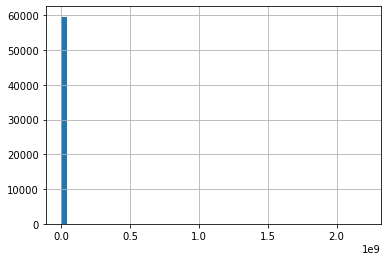

In [303]:
df["SALE PRICE"].hist(bins=50)

/Users/fosterinsight/opt/anaconda3/envs/Soostone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



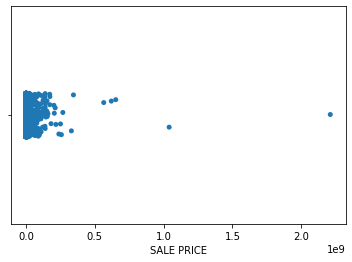

In [304]:
sns.stripplot(df["SALE PRICE"])

In [305]:
df[df["SALE PRICE"]<1070000]["SALE PRICE"].median()

490000.0

/Users/fosterinsight/opt/anaconda3/envs/Soostone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



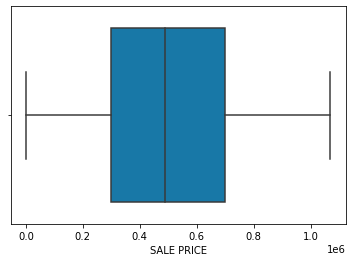

In [306]:
#Distribution of houses - Less $1 Million 
sns.boxplot(df[df["SALE PRICE"]<1070000]["SALE PRICE"],palette="winter" )

In [307]:
df[df["SALE PRICE"]>1000000000]

Unnamed: 0 BOROUGH NEIGHBORHOOD  \
2559        2563       1    FINANCIAL   
7447        7451       1  MIDTOWN CBD   

                          BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
2559  21 OFFICE BUILDINGS                                            4     40   
7447  21 OFFICE BUILDINGS                                            4   1301   

      LOT BUILDING CLASS AT PRESENT          ADDRESS APARTMENT NUMBER  ...  \
2559    3                        O4   60 WALL STREET                   ...   
7447    1                        O4  245 PARK AVENUE                   ...   

     RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
2559                 0                 1            1             53632   
7447                 0                35           35             81336   

     GROSS SQUARE FEET YEAR BUILT  TAX CLASS AT TIME OF SALE  \
2559           1617206       1987                          4   
7447           1586886       1966                          4   

      BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE  
2559                              O4  1040000000 2017-01-24  
7447                              O4  2210000000 2017-05-05  

[2 rows x 21 columns]

In [308]:
len(df[df["SALE PRICE"]<10000]["SALE PRICE"])

1294

In [309]:
len(df[df["SALE PRICE"]<1000]["SALE PRICE"])

1078

- The cheapest condos in NYX stars from ~$10,000
- We can remove 1078 rows with less than $1000 and keep 216 with less than $10,000

In [310]:
len(df[df["SALE PRICE"]>500000000]["SALE PRICE"])

5

In [311]:
df = df[(df["SALE PRICE"]>=1000)]

### Sale Price Group

The 50% of houses had price $625,500 and less. 25%, 50% and 75% may define a price tiers for us to simplify understand relation between feature values and SALE PRICE data. With this in mind, let's add a new column SALE PRICE GROUP with four tiers:

#### Cheap Groups:

- Less than 25% houses (<=$370k)

- Houses from 25%-50% range (>$370k and <=\$625k)

#### Expensive Groups:

- Houses from 50%-75% range (>625k and <=\$1M)

- 75% and more

In [312]:
# Create a SALE PRICE CATEGORY Attribute
def impute_sale_price_group(sale_price):
    if sale_price <= 370000:
        return "25% and less (<$370,000)"
    if sale_price > 370000 and sale_price <= 625500:
        return "25% - 50% ($370,000 - $625,500)"
    if sale_price > 625500 and sale_price < 1070000:
        return "50% - 75% ($625,500- $1,070,000)"
    if sale_price >= 1070000:
        return "75% and more (>$1,070,000)"

df['SalePriceGroup'] = df['SALE PRICE'].apply(impute_sale_price_group)

## 2. Borough

- Boroughs in NYC are Manhattan, Queens, Brooklyn, Bronx, Staten Islands.
- 1: Manhattan
- 2: Bronx
- 3: Brooklyn
- 4: Queens
- 5: Staten Island

In [313]:
#Encode Borough 
conditions = [
    df["BOROUGH"] == 1,
    df["BOROUGH"] == 2,
    df["BOROUGH"] == 3,
    df["BOROUGH"] == 4,
    df["BOROUGH"] == 5
]

outputs = [
    "Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"
]

df["BOROUGH"] = np.select(conditions, outputs, 'Other')

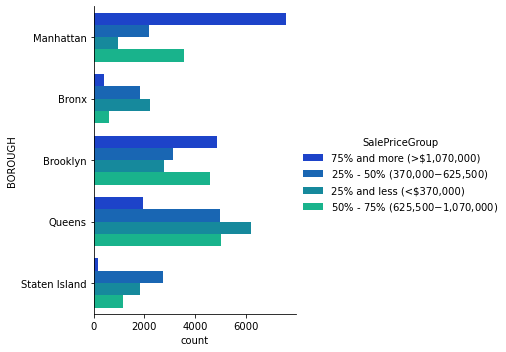

In [314]:
#House Prices in NYC Boroughs
sns.catplot(data=df, y='BOROUGH', hue='SalePriceGroup', kind='count', palette="winter")

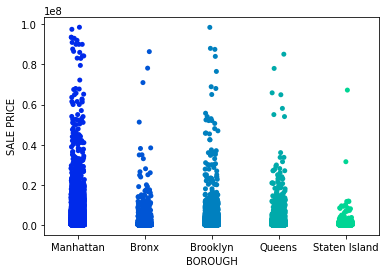

In [315]:
#House Prices Distribution in NYC Boroughs
sns.stripplot(y=df[df["SALE PRICE"]<100000000]["SALE PRICE"], x=df["BOROUGH"], palette="winter")

- Manhattan and Brooklyn may be located around the city center, including hotels and commercial places



#### Type of the houses in Manhattan & Staten Island

In [316]:
df[df["BOROUGH"]=="Manhattan"]["BUILDING CLASS CATEGORY"].value_counts()

13 CONDOS - ELEVATOR APARTMENTS                 5755
10 COOPS - ELEVATOR APARTMENTS                  5354
17 CONDO COOPS                                   886
09 COOPS - WALKUP APARTMENTS                     741
07 RENTALS - WALKUP APARTMENTS                   361
15 CONDOS - 2-10 UNIT RESIDENTIAL                202
08 RENTALS - ELEVATOR APARTMENTS                  93
43 CONDO OFFICE BUILDINGS                         92
02 TWO FAMILY DWELLINGS                           83
01 ONE FAMILY DWELLINGS                           79
45 CONDO HOTELS                                   79
26 OTHER HOTELS                                   77
12 CONDOS - WALKUP APARTMENTS                     68
21 OFFICE BUILDINGS                               63
22 STORE BUILDINGS                                53
46 CONDO STORE BUILDINGS                          42
47 CONDO NON-BUSINESS STORAGE                     37
03 THREE FAMILY DWELLINGS                         37
14 RENTALS - 4-10 UNIT                        

- The most of the houses in Manhattan are apartments with elevators (but we remove the houses from data because land/gross square feet information was missing)

In [317]:
df[df["BOROUGH"]=="Staten Island"]["BUILDING CLASS CATEGORY"].value_counts()

01 ONE FAMILY DWELLINGS                        3519
02 TWO FAMILY DWELLINGS                        1318
04 TAX CLASS 1 CONDOS                           397
13 CONDOS - ELEVATOR APARTMENTS                 128
05 TAX CLASS 1 VACANT LAND                      125
09 COOPS - WALKUP APARTMENTS                     53
10 COOPS - ELEVATOR APARTMENTS                   50
22 STORE BUILDINGS                               49
03 THREE FAMILY DWELLINGS                        40
31 COMMERCIAL VACANT LAND                        36
12 CONDOS - WALKUP APARTMENTS                    32
21 OFFICE BUILDINGS                              28
07 RENTALS - WALKUP APARTMENTS                   28
29 COMMERCIAL GARAGES                            21
30 WAREHOUSES                                    10
06 TAX CLASS 1 - OTHER                           10
14 RENTALS - 4-10 UNIT                            6
27 FACTORIES                                      5
26 OTHER HOTELS                                   4
41 TAX CLASS

## 3. Neighborhood

In [318]:
# THE MOST EXPENSIVE NEIGHBORHOODS IN NYC
nbs = df.groupby(by=['NEIGHBORHOOD', 'BOROUGH'], as_index=False)['SALE PRICE'].median()
nbs.sort_values(by='SALE PRICE', ascending=False).head(10)

NEIGHBORHOOD        BOROUGH  SALE PRICE
21                 BLOOMFIELD  Staten Island  31500000.0
69                 EAST RIVER          Bronx  11200000.0
43               CIVIC CENTER      Manhattan   5193075.0
134              LITTLE ITALY      Manhattan   3750000.0
201      ROSSVILLE-PORT MOBIL  Staten Island   3125000.0
227                   TRIBECA      Manhattan   2950000.0
208                      SOHO      Manhattan   2830093.5
83                   FLATIRON      Manhattan   2456400.0
230  UPPER EAST SIDE (96-110)      Manhattan   1965000.0
76                    FASHION      Manhattan   1872500.0

In [319]:
# THE MOST EXPENSIVE NEIGHBORHOODS IN NYC (When NAs in square feet removed)
nbs = df2.groupby(by=['NEIGHBORHOOD', 'BOROUGH'], as_index=False)['SALE PRICE'].median()
nbs.sort_values(by='SALE PRICE', ascending=False).head(10)

NEIGHBORHOOD    BOROUGH   SALE PRICE
77          FINANCIAL  Manhattan  100107200.0
225           TRIBECA  Manhattan   90000000.0
147       MIDTOWN CBD  Manhattan   90000000.0
75            FASHION  Manhattan   52500000.0
194  ROOSEVELT ISLAND  Manhattan   23296741.0
211       SOUTHBRIDGE  Manhattan   19000000.0
42       CIVIC CENTER  Manhattan   15000000.0
130          KIPS BAY  Manhattan   13850000.0
132      LITTLE ITALY  Manhattan   13100000.0
206              SOHO  Manhattan   12613059.0

In [320]:
#MAXIMUM SALES IN NEIGHBORHOODS
nbs = df.groupby(by=['NEIGHBORHOOD', 'BOROUGH'], as_index=False)['SALE PRICE'].max()
nbs.sort_values(by='SALE PRICE', ascending=False).head(10)

NEIGHBORHOOD    BOROUGH  SALE PRICE
149             MIDTOWN CBD  Manhattan  2210000000
78                FINANCIAL  Manhattan  1040000000
132                KIPS BAY  Manhattan   620000000
76                  FASHION  Manhattan   565000000
63    DOWNTOWN-FULTON FERRY   Brooklyn   345000000
127           JAVITS CENTER  Manhattan   330000000
151            MIDTOWN WEST  Manhattan   268124175
137        LONG ISLAND CITY     Queens   257500000
150            MIDTOWN EAST  Manhattan   217500000
106  GREENWICH VILLAGE-WEST  Manhattan   205961801

In [321]:
#MAXIMUM SALES IN NEIGHBORHOODS (When NAs in square feet removed)
nbs = df2.groupby(by=['NEIGHBORHOOD', 'BOROUGH'], as_index=False)['SALE PRICE'].max()
nbs.sort_values(by='SALE PRICE', ascending=False).head(10)

NEIGHBORHOOD    BOROUGH  SALE PRICE
147              MIDTOWN CBD  Manhattan  2210000000
77                 FINANCIAL  Manhattan  1040000000
130                 KIPS BAY  Manhattan   620000000
75                   FASHION  Manhattan   565000000
125            JAVITS CENTER  Manhattan   330000000
149             MIDTOWN WEST  Manhattan   268124175
135         LONG ISLAND CITY     Queens   257500000
104   GREENWICH VILLAGE-WEST  Manhattan   205961801
230  UPPER WEST SIDE (79-96)  Manhattan   172500000
63      DOWNTOWN-FULTON MALL   Brooklyn   154250000

- LONG ISLAND CITY: "Long Island City is in Queens County and is one of the best places to live in New York. Living in Long Island City offers residents a dense urban feel and most residents rent their homes. In Long Island City there are a lot of bars, restaurants, coffee shops, and parks."

In [322]:
#THE MOST AFFORDABLE NEIGHBORHOODS IN NYC 
nbs.sort_values(by='SALE PRICE', ascending=True).head(10)

NEIGHBORHOOD        BOROUGH  SALE PRICE
176             PELHAM BAY          Bronx          10
90             FRESH KILLS  Staten Island      309003
46              CO-OP CITY          Bronx      430000
212           SPRING CREEK       Brooklyn      441761
51       CONCORD-FOX HILLS  Staten Island      521000
122            JAMAICA BAY         Queens      550000
26              BRONX PARK          Bronx      560000
60   DONGAN HILLS-OLD TOWN  Staten Island      625000
216      STAPLETON-CLIFTON  Staten Island      715000
5     ARROCHAR-SHORE ACRES  Staten Island      715000

In [323]:
#THE MOST AFFORDABLE NEIGHBORHOODS IN NYC 
nbs.sort_values(by='SALE PRICE', ascending=True).head(10)

NEIGHBORHOOD        BOROUGH  SALE PRICE
176             PELHAM BAY          Bronx          10
90             FRESH KILLS  Staten Island      309003
46              CO-OP CITY          Bronx      430000
212           SPRING CREEK       Brooklyn      441761
51       CONCORD-FOX HILLS  Staten Island      521000
122            JAMAICA BAY         Queens      550000
26              BRONX PARK          Bronx      560000
60   DONGAN HILLS-OLD TOWN  Staten Island      625000
216      STAPLETON-CLIFTON  Staten Island      715000
5     ARROCHAR-SHORE ACRES  Staten Island      715000

- Manhattan is the most expensive borough while Staten Island and Bronx are the most affordable ones. 
- Apartments are more common in Manhattan
- Family dwellings and condos are more common in Bronx

In [324]:
# THE MOST AFFORDABLE NEIGHBORHOOD & BOROGH MEDIAN SALE PRICE
grouped_df = df2.groupby(["BOROUGH", "NEIGHBORHOOD"])
grouped_df = grouped_df.agg({"SALE PRICE": "median"})
grouped_df = grouped_df.reset_index()
grouped_df

BOROUGH          NEIGHBORHOOD  SALE PRICE
0            Bronx              BATHGATE    290000.0
1            Bronx            BAYCHESTER    325000.0
2            Bronx  BEDFORD PARK/NORWOOD    402500.0
3            Bronx               BELMONT    300000.0
4            Bronx            BRONX PARK    560000.0
..             ...                   ...         ...
246  Staten Island                TRAVIS    432500.0
247  Staten Island     WEST NEW BRIGHTON    415000.0
248  Staten Island           WESTERLEIGH    530250.0
249  Staten Island           WILLOWBROOK    600000.0
250  Staten Island               WOODROW    549000.0

[251 rows x 3 columns]

In [325]:
fig = px.bar(grouped_df, x="NEIGHBORHOOD", y="SALE PRICE", color="BOROUGH").update_xaxes(categoryorder="total descending", title= "Median House Prices by Neighborhood in NYC")
fig.show()

In [327]:
fig = px.bar(grouped_df[grouped_df["BOROUGH"]=="Manhattan"], x="NEIGHBORHOOD", y="SALE PRICE").update_xaxes(categoryorder="total descending", title= "Median House Prices by Neighborhood in Manhattan")
fig.show()

In [328]:
fig = px.bar(grouped_df[grouped_df["BOROUGH"]=="Bronx"], x="NEIGHBORHOOD", y="SALE PRICE").update_xaxes(categoryorder="total descending", title= "Median House Prices by Neighborhood in Bronx")
fig.show()

In [225]:
fig = px.bar(grouped_df[grouped_df["BOROUGH"]=="Brooklyn"], x="NEIGHBORHOOD", y="SALE PRICE").update_xaxes(categoryorder="total descending", title= "Median House Prices by Neighborhood in Brooklyn")
fig.show()

In [226]:
fig = px.bar(grouped_df[grouped_df["BOROUGH"]=="Staten Island"], x="NEIGHBORHOOD", y="SALE PRICE").update_xaxes(categoryorder="total descending", title= "Median House Prices by Neighborhood in Staten Island")
fig.show()

In [227]:
fig = px.bar(grouped_df[grouped_df["BOROUGH"]=="Queens"], x="NEIGHBORHOOD", y="SALE PRICE").update_xaxes(categoryorder="total descending", title= "Median House Prices by Neighborhood in Queens")
fig.show()

- Downtown MetroTech, East River, Long Island are central districts to boroughs

## 4. Year Built

In [329]:
df["YEAR BUILT"].describe()

count    58681.000000
mean      1811.507166
std        503.549510
min          0.000000
25%       1920.000000
50%       1940.000000
75%       1966.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

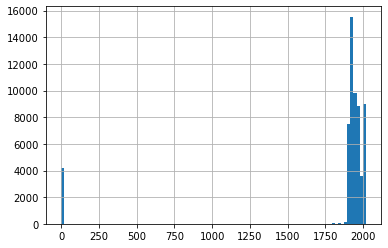

In [330]:
df["YEAR BUILT"].hist(bins=100)

/Users/fosterinsight/opt/anaconda3/envs/Soostone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



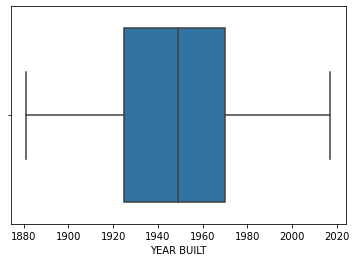

In [331]:
sns.boxplot(df[df["YEAR BUILT"]>1880]["YEAR BUILT"])

In [332]:
df = df[df["YEAR BUILT"]>1880]

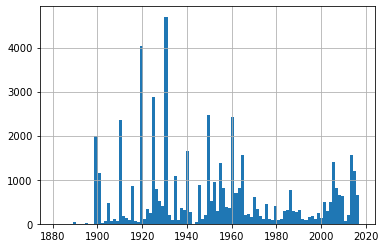

In [333]:
df["YEAR BUILT"].hist(bins=100)

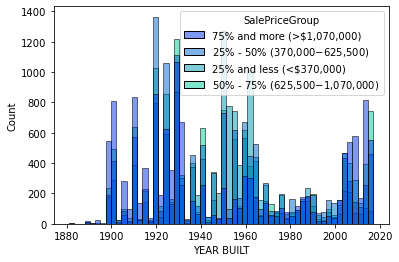

In [334]:
sns.histplot(x= df["YEAR BUILT"], hue=df['SalePriceGroup'], palette="winter")

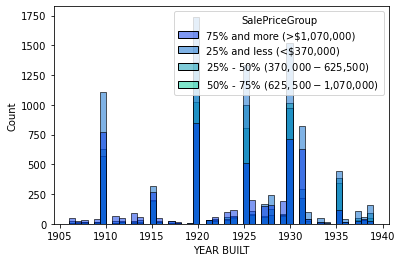

In [132]:
sns.histplot(data=df[(df["YEAR BUILT"]>1905)&(df["YEAR BUILT"]<1940)] ,x= "YEAR BUILT", hue='SalePriceGroup', palette="winter")

- There is a 5 year pattern; 1910, 1915, 1920, ...

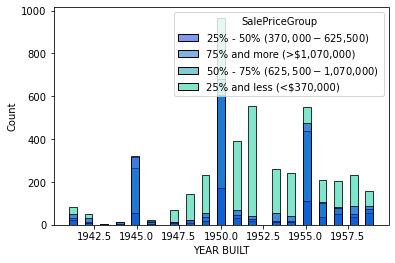

In [129]:
sns.histplot(data=df[(df["YEAR BUILT"]>1940)&(df["YEAR BUILT"]<1960)] ,x= "YEAR BUILT", hue='SalePriceGroup', palette="winter")

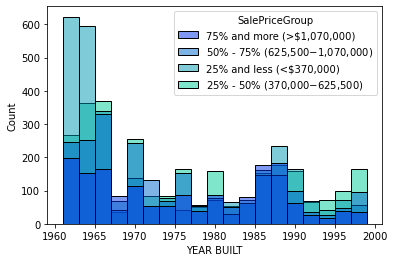

In [335]:
sns.histplot(data=df[(df["YEAR BUILT"]>1960)&(df["YEAR BUILT"]<2000)] ,x= "YEAR BUILT", hue='SalePriceGroup', palette="winter")

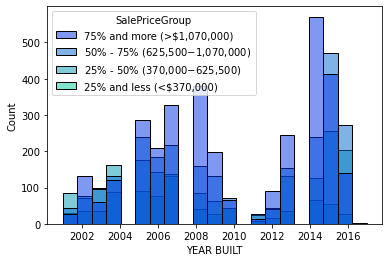

In [336]:
sns.histplot(data=df[df["YEAR BUILT"]>2000] ,x= "YEAR BUILT", hue='SalePriceGroup', palette="winter")

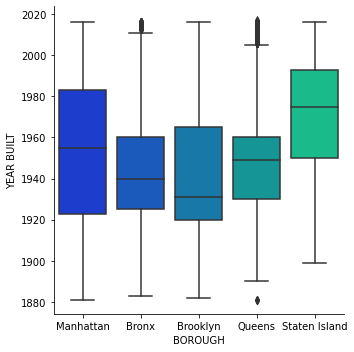

In [337]:
sns.catplot(data=df, x='BOROUGH', y='YEAR BUILT', kind='box', palette="winter")

- Staten Island is relatively a new residential are compared to other boroughs

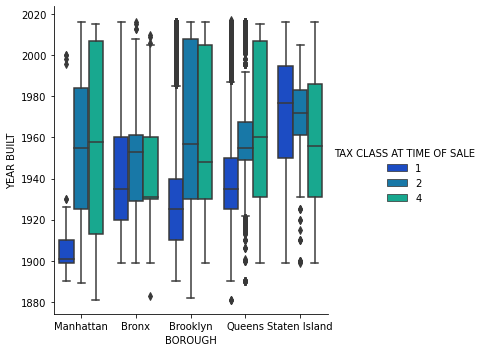

In [338]:
sns.catplot(data=df, x='BOROUGH', y='YEAR BUILT', hue="TAX CLASS AT TIME OF SALE" , kind='box', palette="winter")

- Manhattan: Tax Class 4 (Commercial and industrial properties)
- Queens: Tax Class 2B (7-10 rental buildings)


- Manhattan and Brooklyn could be earliest residental area as well as including commercial districts

## 5. Building Class Category

- New Feature: Is commercial 
- New Feature: Condo, Apartment, Dwellings, ??

In [339]:
df["BUILDING CLASS CATEGORY"].value_counts()

01 ONE FAMILY DWELLINGS                         12701
10 COOPS - ELEVATOR APARTMENTS                  11515
02 TWO FAMILY DWELLINGS                          9863
13 CONDOS - ELEVATOR APARTMENTS                  7940
09 COOPS - WALKUP APARTMENTS                     2485
03 THREE FAMILY DWELLINGS                        2322
07 RENTALS - WALKUP APARTMENTS                   1737
17 CONDO COOPS                                    940
04 TAX CLASS 1 CONDOS                             925
15 CONDOS - 2-10 UNIT RESIDENTIAL                 840
22 STORE BUILDINGS                                477
12 CONDOS - WALKUP APARTMENTS                     444
14 RENTALS - 4-10 UNIT                            325
21 OFFICE BUILDINGS                               222
44 CONDO PARKING                                  206
43 CONDO OFFICE BUILDINGS                         201
08 RENTALS - ELEVATOR APARTMENTS                  197
29 COMMERCIAL GARAGES                             179
30 WAREHOUSES               

In [340]:
grouped_df = df.groupby(["BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT"])
grouped_df = grouped_df.agg({"SALE PRICE": "median"})
grouped_df = grouped_df.reset_index()
grouped_df.head()

BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0  01 ONE FAMILY DWELLINGS                                        1   
1  01 ONE FAMILY DWELLINGS                                       1B   
2  01 ONE FAMILY DWELLINGS                                        2   
3  02 TWO FAMILY DWELLINGS                                        1   
4  02 TWO FAMILY DWELLINGS                                       1B   

   SALE PRICE  
0    510000.0  
1    504500.0  
2   1425000.0  
3    657350.0  
4   1450000.0

In [341]:
#COMMERCIAL PROPERTIES MEDIAN SALE PRICES
fig = px.bar(grouped_df[grouped_df["TAX CLASS AT PRESENT"].isin(["4"])], x="BUILDING CLASS CATEGORY", y="SALE PRICE", color="TAX CLASS AT PRESENT").update_xaxes(categoryorder="total descending", title= "Median House Prices by Neighborhood in NYC")
fig.show()

In [342]:
#RESIDENTIAL PROPERTIES 
df[df["TAX CLASS AT PRESENT"].isin(["2", "1", "2A", "2B"])]["BUILDING CLASS CATEGORY"].value_counts()

In [343]:
residental = df[df["TAX CLASS AT PRESENT"].isin(["1", "2", "2A","2B"])]

In [344]:
grouped_df = residental.groupby(["BUILDING CLASS CATEGORY", "BOROUGH"])
grouped_df = grouped_df.agg({"SALE PRICE": "median"})
grouped_df = grouped_df.reset_index()
grouped_df.head()

BUILDING CLASS CATEGORY        BOROUGH  SALE PRICE
0  01 ONE FAMILY DWELLINGS                              Bronx    400000.0
1  01 ONE FAMILY DWELLINGS                           Brooklyn    680000.0
2  01 ONE FAMILY DWELLINGS                          Manhattan   6425000.0
3  01 ONE FAMILY DWELLINGS                             Queens    550000.0
4  01 ONE FAMILY DWELLINGS                      Staten Island    470000.0

In [345]:
fig = px.bar(grouped_df, x="BUILDING CLASS CATEGORY", y="SALE PRICE", color="BOROUGH", color_discrete_sequence=px.colors.qualitative.Vivid).update_xaxes(categoryorder="total descending", title= "Median House Prices by Neighborhood in NYC")
fig.show()

## 6. Tax Class Category

Property in NYC is divided into 4 classes:

- Class 1: Most residential property of up to three units (family homes and small stores or offices with one or two apartments attached), and most condominiums that are not more than three stories.

- Class 2: All other property that is not in Class 1 and is primarily residential (rentals, cooperatives and condominiums). Class 2 includes:
    Sub-Class 2a  (4 -  6 unit rental building);
    Sub-Class 2b  (7 - 10 unit rental building);
    Sub-Class 2c  (2 - 10 unit cooperative or condominium); and
Class 2  (11 units or more).
- Class 3: Most utility property.
- Class 4: All commercial and industrial properties, such as office, retail, factory buildings and all other properties not included in tax classes 1, 2 or 3.

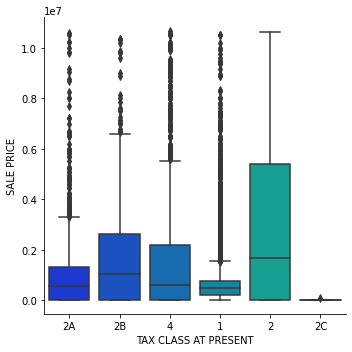

In [346]:
sns.catplot(data=df2[df2["SALE PRICE"]<10700000], x="TAX CLASS AT PRESENT", y='SALE PRICE', kind='box', palette="winter")

- Residental house prices (with tax class 2) may be more predictable

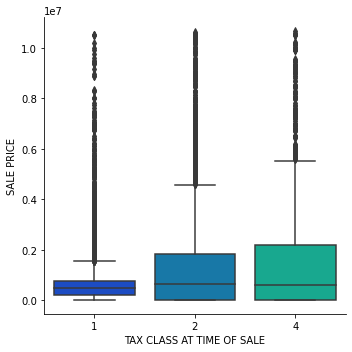

In [243]:
sns.catplot(data=df2[df2["SALE PRICE"]<10700000], x="TAX CLASS AT TIME OF SALE", y='SALE PRICE', kind='box', palette="winter")

- Tax class 2 and 4 have approximately same median prices, somehow there are more buildings more expensive than median sale price

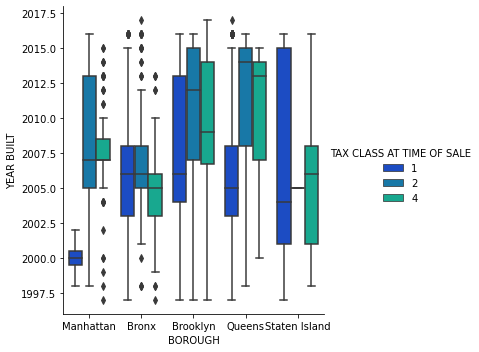

In [244]:
#Tax class of the properties built after 2000 by Neighborhood
sns.catplot(data=df[df["YEAR BUILT"]>1996], x='BOROUGH', y='YEAR BUILT', hue="TAX CLASS AT TIME OF SALE" , kind='box', palette="winter")

- New commercial buildings are in all neighborhoods but Manhattan. Because Manhattan is already a commercial district
- Staten Island looks like a new residential borough where also there is commercial real-estate investment

- Tax class 3 doesn't have data beside 0 or - values in SALE PRICE

## 7.  Land/Gross Square Feet

In [347]:
df2 = df[ (df["LAND SQUARE FEET"].notnull() ) & ( df["GROSS SQUARE FEET"].notnull() )]
df2["LAND SQUARE FEET"] = df2["LAND SQUARE FEET"].astype(str).astype(int)
df2["GROSS SQUARE FEET"] = df2["GROSS SQUARE FEET"].astype(str).astype(int)
df2 = df2[df2["LAND SQUARE FEET"]!=0]
df2 = df2[df2["GROSS SQUARE FEET"]!=0]

<ipython-input-347-5e25016a0d26>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-347-5e25016a0d26>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [348]:
# Gross/Land
df2["SQUARE FEET RATIO"] = df2["GROSS SQUARE FEET"]/df2["LAND SQUARE FEET"]
df2["SQUARE FEET RATIO"].describe().T

count    28502.000000
mean         1.000392
std          1.233075
min          0.009094
25%          0.483960
50%          0.706439
75%          1.115000
max         30.153751
Name: SQUARE FEET RATIO, dtype: float64

In [349]:
#Places where gross square feet is higher land square feet
len(df2[df2["SQUARE FEET RATIO"]>1])

8562

In [350]:
df2[df2["SQUARE FEET RATIO"]>1]["BUILDING CLASS CATEGORY"].value_counts().head(10)

02 TWO FAMILY DWELLINGS                        2975
03 THREE FAMILY DWELLINGS                      1671
07 RENTALS - WALKUP APARTMENTS                 1581
01 ONE FAMILY DWELLINGS                        1077
14 RENTALS - 4-10 UNIT                          306
22 STORE BUILDINGS                              237
08 RENTALS - ELEVATOR APARTMENTS                195
21 OFFICE BUILDINGS                             145
26 OTHER HOTELS                                  89
30 WAREHOUSES                                    62
Name: BUILDING CLASS CATEGORY, dtype: int64

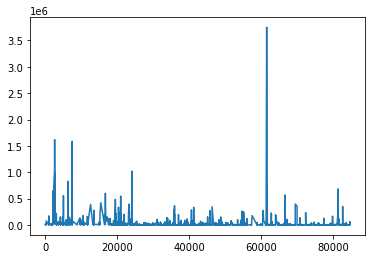

In [351]:
df2["GROSS SQUARE FEET"].plot()

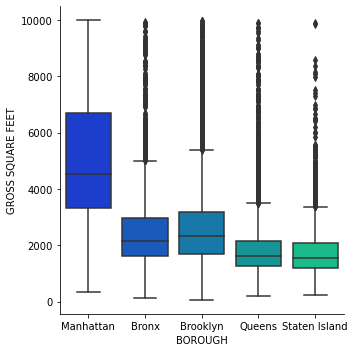

In [186]:
sns.catplot(data=df2[df2["GROSS SQUARE FEET"]<10000], x="BOROUGH", y="GROSS SQUARE FEET", kind='box', palette="winter")

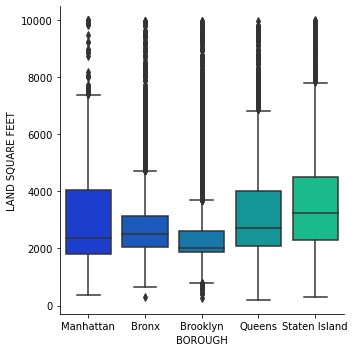

In [187]:
sns.catplot(data=df2[df2["LAND SQUARE FEET"]<10000], x="BOROUGH", y="LAND SQUARE FEET", kind='box', palette="winter")

- Higher buildings have higher Gross Square Feet than Land Square Feet. So, Manhattan has higher buildings.

#### GROSS SQUARE FEET

In [352]:
#PRICE PER SQUARE BY BOROUGH
fig = px.scatter(df2, x="GROSS SQUARE FEET", y="SALE PRICE", color="BOROUGH", facet_col="BOROUGH", trendline="ols", color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update(layout_yaxis_range = [-9.5e+4,600000000])
fig.update(layout_xaxis_range = [-1000,2000000])
fig.show()

## 8.  Residential/Commercial Units

In [353]:
df["is_commercial_unit"] = np.where(df["COMMERCIAL UNITS"]>0, "Commercial", "No Commercial Units")

<ipython-input-353-7cd75511f7bd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [354]:
#df[COMMERCIAL UNIT RATIO]
df["is_commercial_unit"].value_counts()/len(df)

No Commercial Units    0.949882
Commercial             0.050118
Name: is_commercial_unit, dtype: float64

In [355]:
#Percentage of properties with commercial unit and tax class
df[(df["is_commercial_unit"]=="Commercial")]["TAX CLASS AT TIME OF SALE"].value_counts()/len(df[df["is_commercial_unit"]=="Commercial"])

4    0.520910
1    0.246515
2    0.232575
Name: TAX CLASS AT TIME OF SALE, dtype: float64

- 52% of the buildings with commercial units are subjected to commercial taxes with tax class 4 

## 9.  Lot > Block 

- Combine lot & block

In [356]:
df["block_lot"] = df["BLOCK"].astype("str") + " - " + df["LOT"].astype("str")

<ipython-input-356-75aed2dce725>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# C. EDA II - Transactions

## House sales mean, median and number of houses sold from Sep. 2016 to Sep. 2017

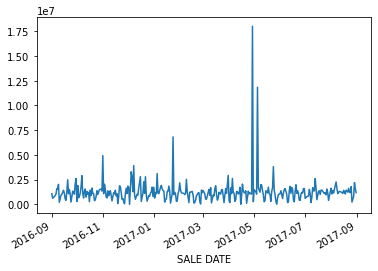

In [357]:
daily_sales_avg = df.groupby('SALE DATE')['SALE PRICE'].mean().sort_index().plot(kind="line")

In [196]:
df.groupby('SALE DATE')['SALE PRICE'].mean().sort_index().sort_values( ascending=False).head()

SALE DATE
2017-05-05    1.010068e+07
2017-01-24    5.829217e+06
2017-04-29    4.909274e+06
2016-11-01    3.934503e+06
2016-12-08    3.504737e+06
Name: SALE PRICE, dtype: float64

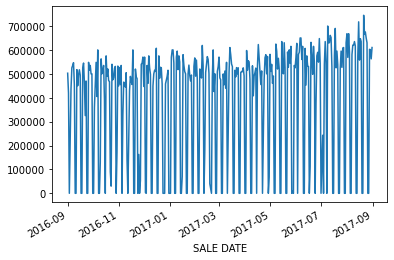

In [197]:
daily_sales_avg = df.groupby('SALE DATE')['SALE PRICE'].median().sort_index().plot(kind="line")

In [198]:
df.groupby('SALE DATE')['SALE PRICE'].median().sort_index().sort_values( ascending=False).head()

SALE DATE
2017-08-21    745000.0
2017-08-15    717500.0
2017-07-09    700000.0
2017-07-18    690000.0
2017-08-23    675000.0
Name: SALE PRICE, dtype: float64

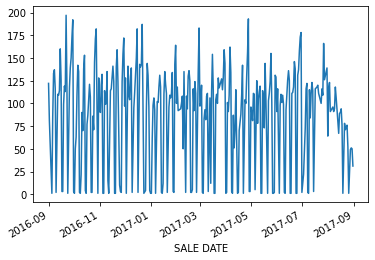

In [536]:
daily_sales_avg = df.groupby('SALE DATE')['SALE PRICE'].count().sort_index().plot(kind="line")

In [359]:
#CREATE DATE FEATURES

#month
df.insert(loc=1, column='month', value=df["SALE DATE"].dt.month)
#monthstart
df.insert(loc=2, column='is_month_start', value=df["SALE DATE"].dt.is_month_start)
#monthend
df.insert(loc=3, column='is_month_end', value=df["SALE DATE"].dt.is_month_end)
# +1 to make Monday=1.....until Sunday=7
df.insert(loc=5, column='day', value=(df["SALE DATE"].dt.dayofweek)+1)
#year
df.insert(loc=7, column='year', value=(df["SALE DATE"].dt.year))

##year_month
df.insert(loc=6, column='year_month', value=df['SALE DATE'].map(lambda x: 100*x.year + x.month))

In [360]:
df.shape 

(54392, 30)

In [369]:
df[(df["year_month"]==201609)&(df["TAX CLASS AT PRESENT"]!=4)].describe().T

count          mean           std       min  \
Unnamed: 0                 5050.0  1.007609e+04  7.004918e+03       7.0   
month                      5050.0  9.000000e+00  0.000000e+00       9.0   
day                        5050.0  3.320396e+00  1.323164e+00       1.0   
year_month                 5050.0  2.016090e+05  0.000000e+00  201609.0   
year                       5050.0  2.016000e+03  0.000000e+00    2016.0   
BLOCK                      5050.0  4.169982e+03  3.541306e+03       1.0   
LOT                        5050.0  3.104790e+02  5.958876e+02       1.0   
RESIDENTIAL UNITS          5050.0  2.065545e+00  1.672429e+01       0.0   
COMMERCIAL UNITS           5050.0  1.631683e-01  2.554828e+00       0.0   
TOTAL UNITS                5050.0  2.243960e+00  1.713596e+01       0.0   
YEAR BUILT                 5050.0  1.950811e+03  3.326614e+01    1882.0   
TAX CLASS AT TIME OF SALE  5050.0  1.635446e+00  7.536608e-01       1.0   
SALE PRICE                 5050.0  1.450639e+06  6.407724e+06    1000.0   

                                 25%       50%       75%          max  
Unnamed: 0                   4078.25    8952.5   15384.5      26689.0  
month                           9.00       9.0       9.0          9.0  
day                             2.00       4.0       4.0          7.0  
year_month                 201609.00  201609.0  201609.0     201609.0  
year                         2016.00    2016.0    2016.0       2016.0  
BLOCK                        1292.00    3179.5    6264.5      16319.0  
LOT                            20.00      45.0     158.5       9002.0  
RESIDENTIAL UNITS               0.00       1.0       2.0        716.0  
COMMERCIAL UNITS                0.00       0.0       0.0        172.0  
TOTAL UNITS                     0.00       1.0       2.0        736.0  
YEAR BUILT                   1925.00    1950.0    1970.0       2016.0  
TAX CLASS AT TIME OF SALE       1.00       2.0       2.0          4.0  
SALE PRICE                 354921.75  595000.0  975000.0  239114603.0

In [368]:
df[(df["year_month"]==201708)&(df["TAX CLASS AT PRESENT"]!=4)].describe().T

count          mean           std       min  \
Unnamed: 0                 3908.0  1.069639e+04  6.942907e+03       6.0   
month                      3908.0  8.000000e+00  0.000000e+00       8.0   
day                        3908.0  2.995394e+00  1.309913e+00       1.0   
year_month                 3908.0  2.017080e+05  0.000000e+00  201708.0   
year                       3908.0  2.017000e+03  0.000000e+00    2017.0   
BLOCK                      3908.0  4.205427e+03  3.643932e+03       1.0   
LOT                        3908.0  3.202431e+02  6.025372e+02       1.0   
RESIDENTIAL UNITS          3908.0  1.461361e+00  7.576133e+00       0.0   
COMMERCIAL UNITS           3908.0  9.979529e-02  1.061107e+00       0.0   
TOTAL UNITS                3908.0  1.569345e+00  7.764452e+00       0.0   
YEAR BUILT                 3908.0  1.948983e+03  3.253756e+01    1890.0   
TAX CLASS AT TIME OF SALE  3908.0  1.637410e+00  6.433712e-01       1.0   
SALE PRICE                 3908.0  1.352245e+06  4.863092e+06    1000.0   

                                 25%       50%         75%          max  
Unnamed: 0                   4649.00   10115.0    15983.75      26671.0  
month                           8.00       8.0        8.00          8.0  
day                             2.00       3.0        4.00          6.0  
year_month                 201708.00  201708.0   201708.00     201708.0  
year                         2017.00    2017.0     2017.00       2017.0  
BLOCK                        1301.25    3115.5     6292.75      16316.0  
LOT                            18.00      44.0      157.00       9002.0  
RESIDENTIAL UNITS               0.00       1.0        1.00        291.0  
COMMERCIAL UNITS                0.00       0.0        0.00         52.0  
TOTAL UNITS                     0.00       1.0        2.00        295.0  
YEAR BUILT                   1925.00    1945.0     1965.00       2016.0  
TAX CLASS AT TIME OF SALE       1.00       2.0        2.00          4.0  
SALE PRICE                 415000.00  699000.0  1145500.00  135000000.0

### How many houses sold each month?

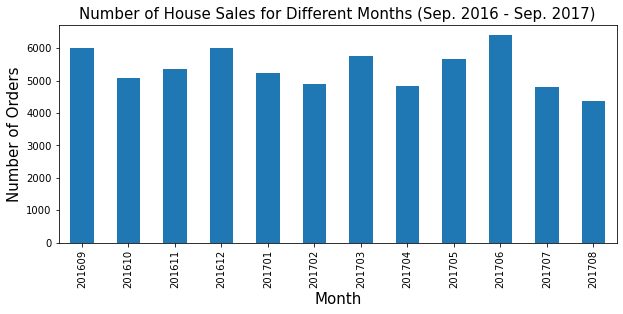

In [245]:
ax = df.groupby('year_month')['SALE PRICE'].count().sort_index().plot(kind='bar',figsize=(10,4))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of House Sales for Different Months (Sep. 2016 - Sep. 2017)',fontsize=15)
plt.show()

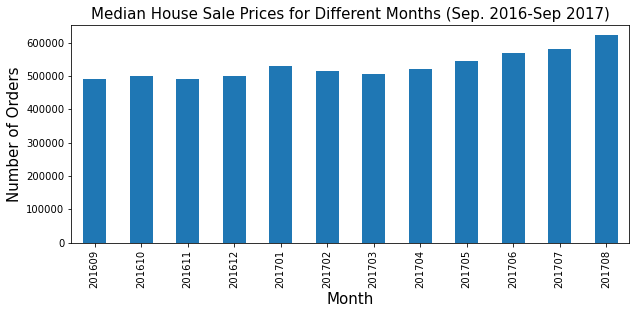

In [247]:
ax = df.groupby('year_month')['SALE PRICE'].median().sort_index().plot(kind='bar',figsize=(10,4))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Median House Sale Prices for Different Months (Sep. 2016-Sep 2017)',fontsize=15)
plt.show()

### Do weekdays affect the house sales?

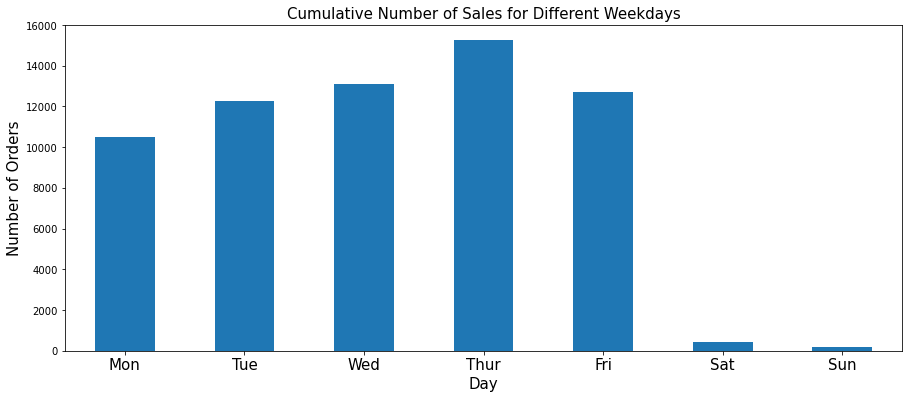

In [248]:
ax = df.groupby('day')['SALE PRICE'].count().sort_index().plot(kind='bar',figsize=(15,6)) #color[1]= orange color
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Cumulative Number of Sales for Different Weekdays',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

- It looks like the house sales peak during the midweek

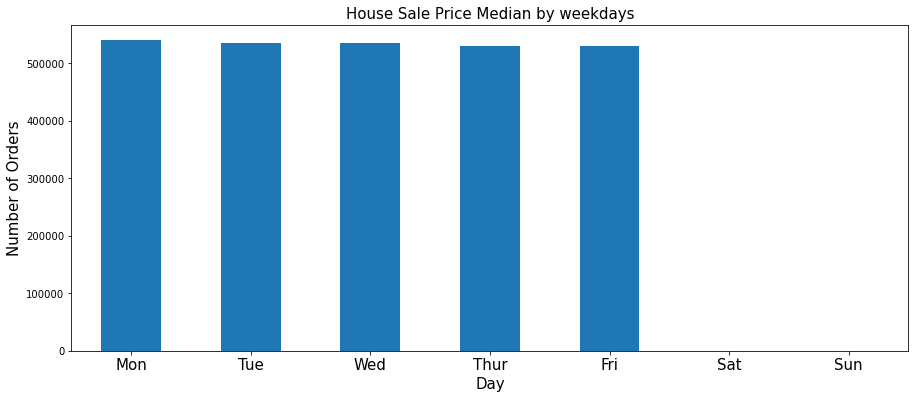

In [249]:
ax = df.groupby('day')['SALE PRICE'].median().sort_index().plot(kind='bar',figsize=(15,6)) 
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('House Sale Price Median by weekdays',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

- Despite that the median prices don't change by weekdays(slightly above $500k), the number of house sold during the midweek is higher

# Export Data & Data Profile for Modelling

In [372]:
#CREATE DATE FEATURES

#month
df2.insert(loc=1, column='month', value=df2["SALE DATE"].dt.month)
#monthstart
df2.insert(loc=2, column='is_month_start', value=df2["SALE DATE"].dt.is_month_start)
#monthend
df2.insert(loc=3, column='is_month_end', value=df2["SALE DATE"].dt.is_month_end)
# +1 to make Monday=1.....until Sunday=7
df2.insert(loc=5, column='day', value=(df2["SALE DATE"].dt.dayofweek)+1)
#year
df2.insert(loc=7, column='year', value=(df2["SALE DATE"].dt.year))

##year_month
df2.insert(loc=6, column='year_month', value=df2['SALE DATE'].map(lambda x: 100*x.year + x.month))

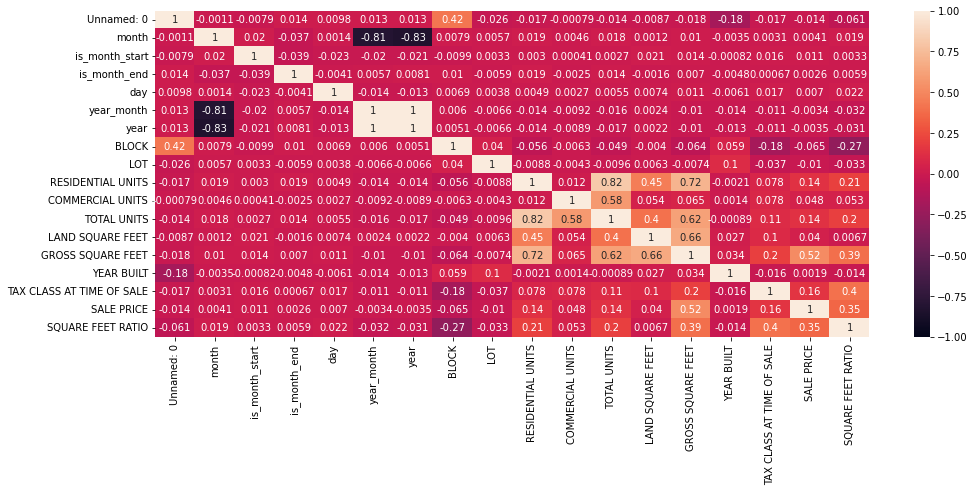

In [444]:
plt.figure(figsize=(16, 6))
sns.heatmap(df2.corr(),  vmin=-1, vmax=1, annot=True)

In [434]:
df["SALE PRICE"].corr(df["BOROUGH"])

0.14636868630482883

In [442]:
df["SALE PRICE"].corr(df["NEIGHBORHOOD"])

0.1140639806778005

In [443]:
df["SALE PRICE"].corr(df["block_lot"])

0.1750068115176485

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54392 entries, 0 to 84547
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      54392 non-null  int64         
 1   month                           54392 non-null  int64         
 2   is_month_start                  54392 non-null  bool          
 3   is_month_end                    54392 non-null  bool          
 4   BOROUGH                         54392 non-null  object        
 5   day                             54392 non-null  int64         
 6   year_month                      54392 non-null  int64         
 7   NEIGHBORHOOD                    54392 non-null  object        
 8   year                            54392 non-null  int64         
 9   BUILDING CLASS CATEGORY         54392 non-null  object        
 10  TAX CLASS AT PRESENT            54392 non-null  object        
 11  BL

## Data Profile Report

In [ ]:
#Before diving into EDA, generate a data profile report
profile = ProfileReport(df2, title="Pandas Profiling Report")
profile.to_file("data_profile.html")

## Csv Export

In [212]:
# Only preprocessing - Land/Gross Square Feet missing values are not removed
df.to_csv("/Data/nyc-houses.csv")

In [213]:
# Data - Land/Gross Square Feet missings are removed
df2.to_csv("/Data/nyc-houses-2.csv")